<a href="https://colab.research.google.com/github/guiseAA/Notebooks_PhDproject/blob/main/CosineDistance_Negative_Samples_EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Instalar gdown e importar bibliotecas
!pip install -q gdown

import gdown
import zipfile
import os

# Baixar o arquivo ZIP do Google Drive
file_id = '1GuAHVk-nvkQEsXlcvb2WeXPE74pW558-'
output = 'arquivo.zip'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

# Descompactar o ZIP
with zipfile.ZipFile("arquivo.zip", 'r') as zip_ref:
    zip_ref.extractall("conteudo_zip")

# Listar arquivos extraídos
print("Arquivos extraídos:")
print(os.listdir("conteudo_zip"))


Downloading...
From (original): https://drive.google.com/uc?id=1GuAHVk-nvkQEsXlcvb2WeXPE74pW558-
From (redirected): https://drive.google.com/uc?id=1GuAHVk-nvkQEsXlcvb2WeXPE74pW558-&confirm=t&uuid=727b5682-412a-40da-a919-7b13bc93b021
To: /content/arquivo.zip
100%|██████████| 497M/497M [00:05<00:00, 85.4MB/s]


Arquivos extraídos:
['content']


In [ ]:
!mv /content/conteudo_zip/content/Project_negativeInstances /content/

In [ ]:
!rm -r /content/conteudo_zip
!rm -r /content/arquivo.zip
!rm -r /content/sample_data/

In [ ]:
#!unzip /content/drive/MyDrive/0.CodeBert-NegativeSamples/Project_negativeInstances_2502.zip

In [ ]:
#!mv /content/Project_negativeInstances_/content/Project_negativeInstances /content/

In [ ]:
#!rm -r /content/sample_data
#!rm -r /content/Project_negativeInstances_
#!rm -r /content/Project_negativeInstances.zip

In [ ]:
#!mv /content/Project_negativeInstances_/content/Project_negativeInstances /content/

In [ ]:
import pandas as pd
from io import StringIO
import re
import csv
import pandas as pd
from io import StringIO
import re
import csv
import numpy as np

# read the positve samples
df_positive = pd.read_csv('/content/Dataset_POSITIVO_1306.csv', sep=",")
df_positive.head()


,SourceCodeMethod,fragment,y
0,public static BibEntry[] extractReferences(Com...,String[] refs = conf.bibReferenceExtractor.ext...,1
1,private void fetchData() { ApiClient.getTestDe...,{ swipeRefreshLayout.setRefreshing(false); } }...,1
2,"public void onTouchDown(float x, float y) { mI...",mStartPos = mCurrentPos;,1
3,public <RT extends RecordTemplate> void execut...,Entry::getKey) .map(RestRequestBatchKey::getRe...,1
4,protected void onDraw(Canvas canvas) { super.o...,float totalLength = mThumbRight - mThumbLeft -...,1


In [ ]:
df_positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SourceCodeMethod  2500 non-null   object
 1   fragment          2500 non-null   object
 2   y                 2500 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 58.7+ KB


In [ ]:
# read the negative samples
df_negative = pd.read_csv('/content/df_NEGATIVO_SF.csv', sep=",")
df_negative.head()

,SourceCodeMethod,fragment,y
0,private int getVersionIndex(final ClassLoader ...,try { loader.loadClass(CLASS_1[0]); return 0; ...,0
1,private int getVersionIndex(final ClassLoader ...,return 0;,0
2,private int getVersionIndex(final ClassLoader ...,final Context context = (Context) callMethod(a...,0
3,private int getVersionIndex(final ClassLoader ...,final int versionCode = context.getPackageMana...,0
4,private int getVersionIndex(final ClassLoader ...,for (int i = 1; i < APP_VERSIONS.length; i++) ...,0


In [ ]:
df_negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619 entries, 0 to 4618
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SourceCodeMethod  4619 non-null   object
 1   fragment          4619 non-null   object
 2   y                 4619 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 108.4+ KB


In [ ]:
from transformers import RobertaTokenizer, RobertaModel
import torch

# Cargar el modelo y el tokenizador preentrenados para CodeBERT
tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")
model = RobertaModel.from_pretrained("microsoft/codebert-base")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# Función para obtener embeddings
def obtener_embedding(texto):
    inputs = tokenizer(texto, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()  # Promedio de los tokens

# Generar embeddings para método y fragmento
df_positive["embedding_method"] = df_positive["SourceCodeMethod"].apply(obtener_embedding)
df_positive["embedding_fragment"] = df_positive["fragment"].apply(obtener_embedding)

df_negative["embedding_method"] = df_negative["SourceCodeMethod"].apply(obtener_embedding)
df_negative["embedding_fragment"] = df_negative["fragment"].apply(obtener_embedding)


In [ ]:
# Combinar embeddings sumando los vectores
df_positive["embedding"] = df_positive.apply(lambda x: x["embedding_method"] + x["embedding_fragment"], axis=1)
df_negative["embedding"] = df_negative.apply(lambda x: x["embedding_method"] + x["embedding_fragment"], axis=1)



In [ ]:
from sklearn.metrics.pairwise import cosine_distances

# Convertir embeddings en matrices de NumPy
X_positive = np.vstack(df_positive["embedding"].values)
X_negative = np.vstack(df_negative["embedding"].values)

# Calcular la matriz de distancias coseno
distancias = cosine_distances(X_negative, X_positive)

# Seleccionar la distancia mínima de cada instancia negativa con cualquier positiva
df_negative["distancia_min"] = distancias.min(axis=1)

# Seleccionar las N instancias más distantes
top_n = 2500
df_negative_seleccionado = df_negative.nlargest(top_n, "distancia_min")


In [ ]:
df_negative_seleccionado

,SourceCodeMethod,fragment,y,embedding_method,embedding_fragment,embedding,distancia_min
112,public void customizeSettings( CodeStyleSettin...,"consumer.showStandardOptions(""SPACE_AROUND_ASS...",0,"[-0.42154497, 0.2618982, 0.34488457, -0.102088...","[-0.4942935, 0.2567556, 0.18436208, -0.1077494...","[-0.9158385, 0.51865375, 0.5292467, -0.2098381...",0.035848
3078,public static String getSensorName(int sensorT...,return SENSOR_NAME_MICROPHONE;,0,"[-0.55738765, 0.58304507, 0.43357357, -0.48251...","[-0.3769248, 0.35170808, 0.24722068, -0.232185...","[-0.93431246, 0.9347532, 0.68079424, -0.714698...",0.032121
3074,public static String getSensorName(int sensorT...,return SENSOR_NAME_ACCELEROMETER;,0,"[-0.55264735, 0.5981918, 0.42749217, -0.479284...","[-0.33427864, 0.26973563, 0.20289403, -0.09116...","[-0.886926, 0.86792743, 0.63038623, -0.5704475...",0.031675
113,public void customizeSettings( CodeStyleSettin...,consumer.showCustomOption(PerlCodeStyleSetting...,0,"[-0.46688378, 0.22285457, 0.19517031, -0.10360...","[-0.36747202, 0.17295876, 0.23644412, 0.085943...","[-0.83435583, 0.39581335, 0.43161443, -0.01766...",0.031078
1633,public void testListAccess() throws Recognitio...,"assertEval(""{ x<-list(1,2L,TRUE,FALSE,5) ; x[c...",0,"[-0.23196086, 0.14100376, 0.2848916, 0.1666925...","[-0.20182955, 0.0941286, 0.25125125, 0.1135504...","[-0.43379042, 0.23513237, 0.5361428, 0.2802429...",0.030776
...,...,...,...,...,...,...,...
14,public void handleLoadPackage(final LoadPackag...,"findAndHookMethod(CLASS_2[i], loader, METHOD_2...",0,"[-0.3716614, 0.2570327, 0.376113, 0.03512134, ...","[-0.34277678, 0.12476192, 0.4085105, 0.0817925...","[-0.7144382, 0.3817946, 0.7846235, 0.116913855...",0.009593
2350,"public File extract(File compressedFile, Strin...","log.trace(""Compressed file {}"", compressedFile);",0,"[-0.5474319, 0.40101883, 0.46267894, -0.130224...","[-0.3814058, 0.024737101, 0.3030224, 0.4243701...","[-0.92883766, 0.42575592, 0.76570135, 0.294145...",0.009591
2719,private String preprocessCode(String pdeCode) ...,Matcher colorMatcher = colorPattern.matcher(so...,0,"[-0.42952895, 0.17004803, 0.4071223, 0.1151319...","[-0.33053425, -0.008479357, 0.43318856, 0.1596...","[-0.7600632, 0.16156867, 0.8403109, 0.27474642...",0.009590
3450,"public String createDescription(Wallet wallet,...","log.error(e.getMessage(), e);",0,"[-0.3922145, 0.33113194, 0.3937209, -0.0331839...","[-0.4167631, -0.13775037, 0.1774874, 0.5772065...","[-0.8089776, 0.19338156, 0.5712083, 0.5440226,...",0.009588


In [ ]:
df_negative_seleccionado.to_csv('df_negative_seleccionado_1606.csv', index=False)

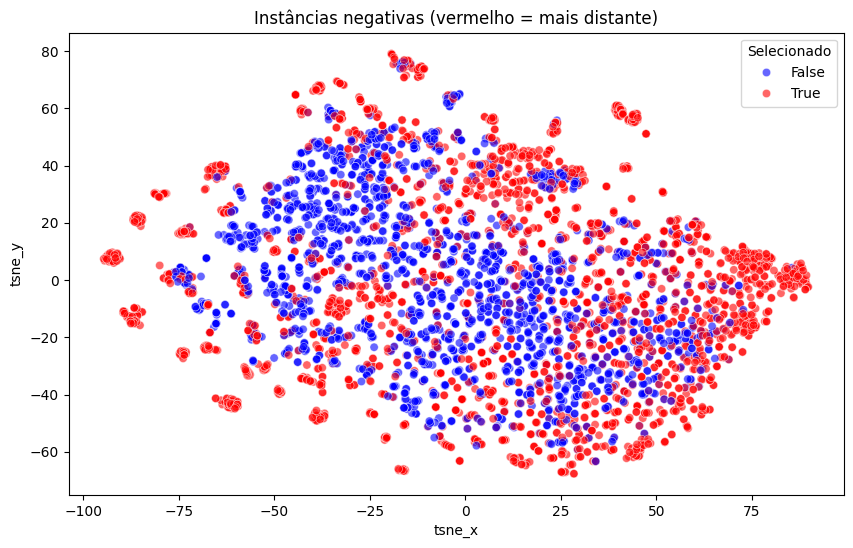

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

# Tomamos las instancias negativas seleccionadas
df_negative["selected"] = df_negative.index.isin(df_negative_seleccionado.index)

# Convertimos los embeddings en matrices de NumPy
X_negative = np.vstack(df_negative["embedding"].values)

# Reducimos la dimensionalidad a 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2D = tsne.fit_transform(X_negative)

# Añadimos las coordenadas al dataframe
df_negative["tsne_x"] = X_2D[:, 0]
df_negative["tsne_y"] = X_2D[:, 1]

# Graficamos las instancias negativas, resaltando las más distantes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_negative, x="tsne_x", y="tsne_y", hue="selected", palette={True: "red", False: "blue"}, alpha=0.6)
plt.title("Instâncias negativas (vermelho = mais distante)")
plt.legend(title="Selecionado")
plt.show()


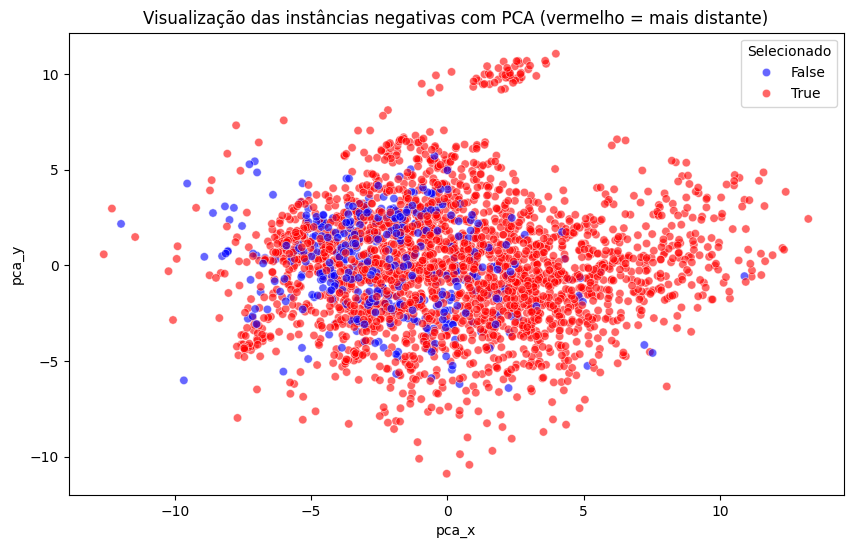

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convertimos los embeddings en matrices de NumPy
X_negative = np.vstack(df_negative["embedding"].values)

# Reducimos la dimensionalidad a 2D con PCA
pca = PCA(n_components=2)
X_2D_pca = pca.fit_transform(X_negative)

# Añadimos las coordenadas al dataframe
df_negative["pca_x"] = X_2D_pca[:, 0]
df_negative["pca_y"] = X_2D_pca[:, 1]

# Graficamos las instancias negativas, resaltando las más distantes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_negative, x="pca_x", y="pca_y", hue="selected", palette={True: "red", False: "blue"}, alpha=0.6)
plt.title("Visualização das instâncias negativas com PCA (vermelho = mais distante)")
plt.legend(title="Selecionado")
plt.show()
